## Application of Text-Mining on Yelp Reviews Dataset

> Objective: To get insights on Earl Sandwich’s customer’s perception of the restaurant from their review data on Yelp and make necessary recommendations for business improvements.  

> Case Background:  The focus of analysis is on ‘Earl Sandwich’ which is the most popular fast-food restaurant as per the highest number of 5-star ratings given to it by users. The reviews dataset consists of a lot of unstructured data, which can be turned into useful insights which can help ‘Earl Sandwich’s Management and Marketing team to better understand how customers like their products or services and more importantly, why, and further help them make business improvements as quickly as possible.

> Requirement Analysis: 
Earl Sandwich as a client needs to know the answers to below questions
1.	How does the yearly trend of number of reviews per month for Earl Sandwich looks like and what does it mean?
2.	How is the customer’s rating for Earl Sandwich distributed? And its inference.
3.	Which are the most common and high frequency words in the reviews data?
4.	Which are the pair of words or which two words often show up together in any review?
5.	What is the user sentiment or opinion attached to the review? Positive or Negative
6.	What is the topic focus of the reviews for ‘Earl Sandwich’ and how it has evolved through time?
7.	Why people love the sandwich? …Is it because of any special flavour, sauce, etc.

> Link to dataset: https://www.kaggle.com/datasets/yelp-dataset/yelp-dataset?select=yelp_academic_dataset_review.json


In [1]:
import numpy as np
import pandas as pd
import json

In [2]:
#Exploring review dataset

df = pd.read_json("yelp_academic_dataset_review.json", lines=True)

In [3]:
df.head()

,votes,user_id,review_id,stars,date,text,type,business_id
0,"{'funny': 0, 'useful': 2, 'cool': 1}",Xqd0DzHaiyRqVH3WRG7hzg,15SdjuK7DmYqUAj6rjGowg,5,2007-05-17,dr. goldberg offers everything i look for in a...,review,vcNAWiLM4dR7D2nwwJ7nCA
1,"{'funny': 0, 'useful': 2, 'cool': 0}",H1kH6QZV7Le4zqTRNxoZow,RF6UnRTtG7tWMcrO2GEoAg,2,2010-03-22,"Unfortunately, the frustration of being Dr. Go...",review,vcNAWiLM4dR7D2nwwJ7nCA
2,"{'funny': 0, 'useful': 1, 'cool': 1}",zvJCcrpm2yOZrxKffwGQLA,-TsVN230RCkLYKBeLsuz7A,4,2012-02-14,Dr. Goldberg has been my doctor for years and ...,review,vcNAWiLM4dR7D2nwwJ7nCA
3,"{'funny': 0, 'useful': 0, 'cool': 0}",KBLW4wJA_fwoWmMhiHRVOA,dNocEAyUucjT371NNND41Q,4,2012-03-02,Been going to Dr. Goldberg for over 10 years. ...,review,vcNAWiLM4dR7D2nwwJ7nCA
4,"{'funny': 0, 'useful': 2, 'cool': 1}",zvJCcrpm2yOZrxKffwGQLA,ebcN2aqmNUuYNoyvQErgnA,4,2012-05-15,Got a letter in the mail last week that said D...,review,vcNAWiLM4dR7D2nwwJ7nCA


In [4]:
df.shape

(1125458, 8)

In [5]:
# Finding out the business with most five star ratings

df_5star = df[df["stars"] == 5]
df_5star.head()

,votes,user_id,review_id,stars,date,text,type,business_id
0,"{'funny': 0, 'useful': 2, 'cool': 1}",Xqd0DzHaiyRqVH3WRG7hzg,15SdjuK7DmYqUAj6rjGowg,5,2007-05-17,dr. goldberg offers everything i look for in a...,review,vcNAWiLM4dR7D2nwwJ7nCA
6,"{'funny': 0, 'useful': 0, 'cool': 0}",jE5xVugujSaskAoh2DRx3Q,kMu0knsSUFW2DZXqKkGWlg,5,2014-01-02,Top notch doctor in a top notch practice. Can'...,review,vcNAWiLM4dR7D2nwwJ7nCA
7,"{'funny': 0, 'useful': 0, 'cool': 0}",QnhQ8G51XbUpVEyWY2Km-A,onDPFgNZpMk-bT1zlForRA,5,2014-01-08,Dr. Eric Goldberg is a fantastic doctor who ha...,review,vcNAWiLM4dR7D2nwwJ7nCA
15,"{'funny': 2, 'useful': 5, 'cool': 0}",Au3Qs-AAZEWu2_4gIMwRgw,SSlO5u2nIJ8PoAKAgN5m3Q,5,2011-12-29,"Yeah, thats right a five freakin star rating. ...",review,JwUE5GmEO-sH1FuwJgKBlQ
18,"{'funny': 2, 'useful': 4, 'cool': 1}",MPKMK36Xp0GuaWaXlUwZ8Q,rgM9f8Xh6ySclVoOSR8MXw,5,2012-02-13,i rarely give five star reviews but for what t...,review,JwUE5GmEO-sH1FuwJgKBlQ


In [6]:
#Counting 5star ratings business_id wise

df_5star['business_id'].value_counts()

2e2e7WgqU1BnpxmQL5jbfw    1684
4bEjOyTaDG24SY5TxsaUNQ    1552
Es300Ys1XXPYg8aI7BKVYQ    1066
zt1TpTuJ6y9n551sw9TaEg     952
AtjsjFzalWqJ7S9DUFQ4bw     932
                          ... 
yDGnyiqo9rAdhx8uAoCcNw       1
8UtH4vO8YuqN08VX_4haBA       1
M0Ng-P35meXxv1Wt3-kq_Q       1
TRD-6PxJX2fWL91dRrny6A       1
kOSSRQ42VYjpxVqDXAT5Sg       1
Name: business_id, Length: 34928, dtype: int64

In [7]:
# We will focus on analaysis of this business id with most 5-star ratings
# Business id represents 'Earl Sandwich' a famous restraunt chain
# creating new dataframe

df_1 = df[df["business_id"] == '2e2e7WgqU1BnpxmQL5jbfw']
df_1.head()

,votes,user_id,review_id,stars,date,text,type,business_id
529180,"{'funny': 1, 'useful': 1, 'cool': 1}",_eE_EQWPOQP6jKRx5I8LIA,zyGJvDbCsEf8_c-D4Hq-PA,3,2007-12-27,"One of the few good, reasonable places to eat ...",review,2e2e7WgqU1BnpxmQL5jbfw
529181,"{'funny': 1, 'useful': 0, 'cool': 0}",Exxw1jpwHZE9I8btkeWsxw,Eag7uduK48akL6vs3ywcig,4,2007-12-27,Very good sandwich. And only costs $6 in Las V...,review,2e2e7WgqU1BnpxmQL5jbfw
529182,"{'funny': 1, 'useful': 1, 'cool': 1}",9BApDAgV8POMQ6VffTz3aA,SqxSdJqxJnK_eZ20gUdwbw,5,2008-01-04,Wow. Amazing. Delicious. The top three word...,review,2e2e7WgqU1BnpxmQL5jbfw
529183,"{'funny': 0, 'useful': 0, 'cool': 0}",YvxEZjjg469Wx68t28yZkg,86w0UJBcvVCVf2o58jDAtg,4,2008-01-11,I had a Turkey club and it was just want I nee...,review,2e2e7WgqU1BnpxmQL5jbfw
529184,"{'funny': 0, 'useful': 1, 'cool': 0}",e9jXM6JRDGNfTS8mq2pE4w,q7BcrZQCIafW-I9W2yfxIg,5,2008-01-17,Wow. If you want reasonably priced food on th...,review,2e2e7WgqU1BnpxmQL5jbfw


In [8]:
df_1.shape

(3263, 8)

## 1.	How does the yearly trend of number of reviews per month for Earl Sandwich looks like and what does it mean?

C:\Users\sachi\AppData\Local\Temp\ipykernel_22452\2318372619.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['date'] = pd.to_datetime(df_1['date'])


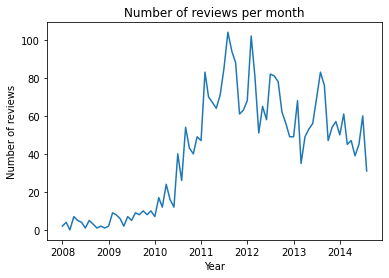

In [9]:
# Exploratory Data Analysis

import matplotlib.pyplot as plt
df_1['date'] = pd.to_datetime(df_1['date'])
df_1 = df_1.set_index('date')
plt.plot(df_1['text'].resample('M').count())
plt.xlabel('Year')
plt.ylabel('Number of reviews')
plt.title('Number of reviews per month')
plt.show()

> With the help of exploratory data analysis techniques and visualizations, we can get the require trend and analyse it. The reviews are from 2008 to 2014, i.e. around six years. The number of reviews per month were increasing sharply from 2010 onwards and it could mean that the fast-food chain was becoming more and more popular between 2010 to 2012 with a peak of almost 100 reviews per month. But there is some decline since then, where we see only 40 customers writing a review every month in 2014. This implies that the company has reached a maturity stage in their business, so to attract new customers, company can experiment with their brand, offerings and relationships.

## 2.	How is the customer’s rating for Earl Sandwich distributed? And its inference.

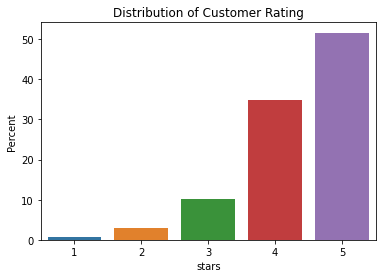

In [10]:
import seaborn as sns
ax = sns.barplot(data=df_1, x='stars', y='stars', estimator=lambda x: len(x) / len(df_1) * 100)
ax.set(ylabel="Percent")
plt.title('Distribution of Customer Rating')
plt.show()

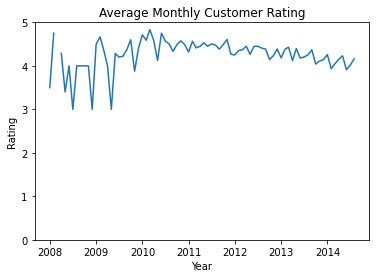

In [11]:
plt.plot(df_1['stars'].resample('M').mean())
plt.xlabel('Year')
plt.ylabel('Rating')
plt.title('Average Monthly Customer Rating')
plt.ylim(0,5)
plt.show()

> Basic visualizations using matplotlib or seaborn library can give us the rating’s distribution which helps us to get average star rating for ‘Earl Sandwich’ and also the monthly trend of the average ratings over the years. We can see that over 80% of the customers have given 4 or 5-star ratings, which means that most of the customers are highly satisfied with the restaurant and also, there is no much variation in the rating and it is quite stable at 4.5. Company should capitalize on its frequent and loyal customers and look for strategies to maintain long term relationships with them and retain them using discounts and loyalty programs.

## 3.	Which are the most common and high frequency words in the reviews data?

> Before analysing the most frequent words we need to pre-process the review text data using various techniques like tokenization (to create token of each word), regular expressions (to remove patterns of unwanted characters and symbols from the sentences), removing stopwords like ‘a’, ‘an’, ‘the’, etc. and stemming & lemmatization technique (process of grouping together the inflected forms of a word so they can be analysed as a single item). After prepossessing, we can create a word cloud of the corpus to highlight the most frequent words. The more a specific word appears in the text, the bigger and bolder it will be in the word cloud.

In [12]:
# Data Cleaning

df_1['text'] = [i.replace("&amp;amp;", '').replace("\'",'') for i in df_1['text']]

In [13]:
#from langdetect import detect_langs
#language = [detect_langs(i) for i in df_1.stars]
#languages = [str(i[0]).split(':')[0] for i in language]
#df_1['language'] = languages

In [14]:
# Pre-processing

import matplotlib.pyplot as plt
%matplotlib inline
import string
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import regexp_tokenize, wordpunct_tokenize, blankline_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sachi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sachi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sachi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\sachi\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [15]:
def preprocessing(text):
    #words = word_tokenize(text)
    words = regexp_tokenize(text, pattern='\w+|\$[\d\.]+|\S+')
    tokens = [w for w in words if w.lower() not in string.punctuation]
    stopw = stopwords.words('english')
    tokens = [token for token in tokens if token not in stopw]
    # remove words less than three letters
    tokens = [word for word in tokens if len(word)>=3]
    # lemmatize
    lemma = WordNetLemmatizer()
    tokens = [lemma.lemmatize(word) for word in tokens] 
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

In [16]:
df_1['text']=df_1['text'].apply(preprocessing)

In [17]:
df_1['text'] = df_1['text'].str.lower()

In [18]:
# Wordcloud

text_1 = df_1['text'].values

In [19]:
def preprocessing(text):
    words = word_tokenize(text)
    tokens = [w for w in words if w.lower() not in string.punctuation]
    stopw = stopwords.words('english')
    tokens = [token for token in tokens if token not in stopw]
    # remove words less than three letters
    tokens = [word for word in tokens if len(word)>=3]
    # lemmatize
    lemma = WordNetLemmatizer()
    tokens = [lemma.lemmatize(word) for word in tokens]
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text 

In [20]:
from wordcloud import WordCloud
wordcloud = WordCloud().generate(str(text_1))

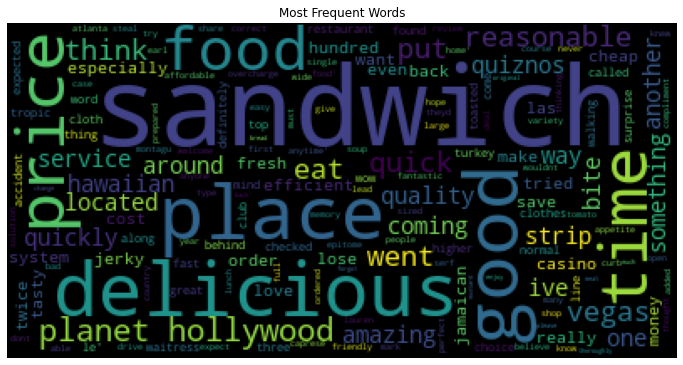

In [21]:
plt.figure(figsize=(12,12))
plt.imshow(wordcloud.recolor(random_state=2017))
plt.title('Most Frequent Words')
plt.axis("off")
plt.show()

In [22]:
# Tokenization
# Bag-of-words

word_list = []
for line in text_1:
    word_list.append(preprocessing(line))
word_list

['one good reasonable place eat vega around planet hollywood sandwich good price reasonable especially lose hundred casino went twice sandwich tried really good one efficient system also order want make fresh quickly save money eat ...',
 'good sandwich cost la vega cheap price love hawaiian sandwich jamaican jerky sandwich tasty even went back another time another restaurant called hawaiian tropic behind checked price time higher waitress clothes cloth time',
 'wow amazing delicious top three word come mind think place found accident walking planet hollywood way strip great surprise turkey club something along line expected something like would get quiznos quiznos normal toasted sandwich delicious thing think ive ever definitely good choice fast service friendly people wide variety hope open around country know theyd welcome atlanta anytime',
 'turkey club want need day eating food convention center yucky sandos toasted fresh take find place immediately satisfied priced well filling t

In [23]:
word_list_token = ' '.join(word_list)
word_list_token

'one good reasonable place eat vega around planet hollywood sandwich good price reasonable especially lose hundred casino went twice sandwich tried really good one efficient system also order want make fresh quickly save money eat ... good sandwich cost la vega cheap price love hawaiian sandwich jamaican jerky sandwich tasty even went back another time another restaurant called hawaiian tropic behind checked price time higher waitress clothes cloth time wow amazing delicious top three word come mind think place found accident walking planet hollywood way strip great surprise turkey club something along line expected something like would get quiznos quiznos normal toasted sandwich delicious thing think ive ever definitely good choice fast service friendly people wide variety hope open around country know theyd welcome atlanta anytime turkey club want need day eating food convention center yucky sandos toasted fresh take find place immediately satisfied priced well filling two thing find

In [24]:
print(word_list_token.split())

['one', 'good', 'reasonable', 'place', 'eat', 'vega', 'around', 'planet', 'hollywood', 'sandwich', 'good', 'price', 'reasonable', 'especially', 'lose', 'hundred', 'casino', 'went', 'twice', 'sandwich', 'tried', 'really', 'good', 'one', 'efficient', 'system', 'also', 'order', 'want', 'make', 'fresh', 'quickly', 'save', 'money', 'eat', '...', 'good', 'sandwich', 'cost', 'la', 'vega', 'cheap', 'price', 'love', 'hawaiian', 'sandwich', 'jamaican', 'jerky', 'sandwich', 'tasty', 'even', 'went', 'back', 'another', 'time', 'another', 'restaurant', 'called', 'hawaiian', 'tropic', 'behind', 'checked', 'price', 'time', 'higher', 'waitress', 'clothes', 'cloth', 'time', 'wow', 'amazing', 'delicious', 'top', 'three', 'word', 'come', 'mind', 'think', 'place', 'found', 'accident', 'walking', 'planet', 'hollywood', 'way', 'strip', 'great', 'surprise', 'turkey', 'club', 'something', 'along', 'line', 'expected', 'something', 'like', 'would', 'get', 'quiznos', 'quiznos', 'normal', 'toasted', 'sandwich', 'd

In [25]:
a = word_tokenize(word_list_token)
a

['one',
 'good',
 'reasonable',
 'place',
 'eat',
 'vega',
 'around',
 'planet',
 'hollywood',
 'sandwich',
 'good',
 'price',
 'reasonable',
 'especially',
 'lose',
 'hundred',
 'casino',
 'went',
 'twice',
 'sandwich',
 'tried',
 'really',
 'good',
 'one',
 'efficient',
 'system',
 'also',
 'order',
 'want',
 'make',
 'fresh',
 'quickly',
 'save',
 'money',
 'eat',
 '...',
 'good',
 'sandwich',
 'cost',
 'la',
 'vega',
 'cheap',
 'price',
 'love',
 'hawaiian',
 'sandwich',
 'jamaican',
 'jerky',
 'sandwich',
 'tasty',
 'even',
 'went',
 'back',
 'another',
 'time',
 'another',
 'restaurant',
 'called',
 'hawaiian',
 'tropic',
 'behind',
 'checked',
 'price',
 'time',
 'higher',
 'waitress',
 'clothes',
 'cloth',
 'time',
 'wow',
 'amazing',
 'delicious',
 'top',
 'three',
 'word',
 'come',
 'mind',
 'think',
 'place',
 'found',
 'accident',
 'walking',
 'planet',
 'hollywood',
 'way',
 'strip',
 'great',
 'surprise',
 'turkey',
 'club',
 'something',
 'along',
 'line',
 'expected',
 

In [26]:
from nltk import FreqDist

token_dist = FreqDist(a)
dist = pd.DataFrame(token_dist.most_common(20),columns=['Word', 'Frequency'])
dist

,Word,Frequency
0,sandwich,7890
1,good,2527
2,earl,2410
3,place,2381
4,vega,2050
5,one,1367
6,time,1312
7,bread,1298
8,get,1250
9,...,1197


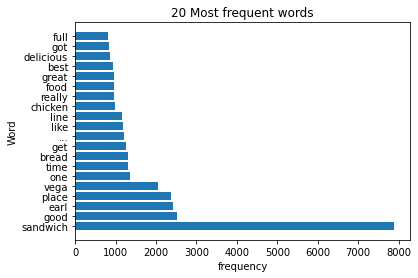

In [27]:
plt.barh(y=dist.Word, width=dist.Frequency)
plt.title('20 Most frequent words')
plt.ylabel('Word')
plt.xlabel('frequency')
plt.rcParams["figure.figsize"] = (20,3)

In [28]:
# Stemming

from nltk.stem import PorterStemmer
porter = PorterStemmer()
stemmed_tokens =[porter.stem(word) for word in a]
stemmed_token_dist = FreqDist(stemmed_tokens)
stemmed_dist = pd.DataFrame(stemmed_token_dist.most_common(20),columns=['Word', 'Frequency'])
stemmed_dist

,Word,Frequency
0,sandwich,7902
1,good,2584
2,earl,2411
3,place,2400
4,vega,2050
5,tri,1435
6,get,1381
7,one,1367
8,time,1314
9,like,1311


Text(0.5, 0, 'frequency')

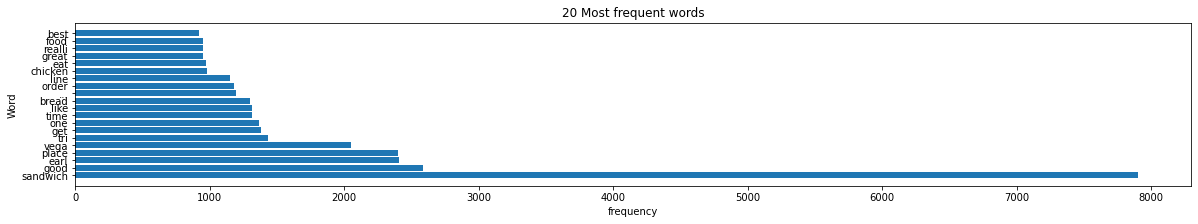

In [29]:
plt.barh(y=stemmed_dist.Word, width=stemmed_dist.Frequency)
plt.title('20 Most frequent words')
plt.ylabel('Word')
plt.xlabel('frequency')

> We can see that “sandwich”, “delicious”, “place”, “good”, “price” and some other words were mentioned by lots of customers. Company should look into the context of these words from the reviews, for e.g. why delicious, which place, what price, etc. to get more insights.

## 4.	Which are the pair of words or which two words often show up together in any review?

> Using the Bag-of-Words approach where we represent the text in numbers, it basically builds a list of words occurring within the corpus and keeps track of their frequencies. However, it discards the word order. But in this case, we need to know the sequence of words. In order to better capture the context, we can consider pairs or triples of words that appear next to each other which gives us more useful information. This process is called N-grams. Here since we need pairs of words, so we will consider Bi-gram.

In [30]:
# N-grams

from nltk.util import ngrams
from collections import Counter

In [31]:
# Creating a function to extract n-grams from text
def get_ngrams(txt, n):
    n_grams = ngrams(nltk.word_tokenize(txt),n)
    return [' '.join(grams) for grams in n_grams]

In [32]:
# print("2-gram:", get_ngrams(str(a), 2))

In [33]:
word_list_1 = str(word_list)

In [34]:
# print("2-gram:", get_ngrams(a_1, 2))

In [35]:
import string

def remove_punctuations(word_list_1):
    words = nltk.word_tokenize(word_list_1)
    punt_removed = [w for w in words if w.lower() not in string.punctuation]
    return " ".join(punt_removed)

In [36]:
word_list_1=remove_punctuations(word_list_1)

In [37]:
#Extracting bigrams
bigrams = get_ngrams(word_list_1, 2)

In [38]:
#Counting bigrams
bigrams_count = Counter(bigrams)

In [39]:
bigram_freq = pd.DataFrame.from_dict(bigrams_count, orient='index')
# Renaming index and column name
bigram_freq = bigram_freq.rename(columns={'index':'words', 0:'frequency'})
bigram_freq = bigram_freq.sort_values(by='frequency', ascending=False).head(20)

In [40]:
print(bigram_freq)

                  frequency
earl sandwich           915
planet hollywood        626
full montagu            477
tuna melt               402
earl club               394
roast beef              373
open hour               336
jerk chicken            333
hot sandwich            271
caribbean jerk          233
best sandwich           230
sandwich good           226
sandwich place          225
tomato soup             209
long line               196
good sandwich           192
late night              191
really good             187
la vega                 178
hawaiian bbq            174


> Earl sandwich seem to be the most popular menu item, and hence the name of the restaurant.  Other top-selling dishes include tuna melt, roast beef and jerk chicken. Pairs of tokens give us more insights than single ones.

## 5.	What is the user sentiment or opinion attached to the reviews? Positive or Negative

> We can perform a sentiment analysis here. We can use lexicon/rule based: VADER method to get it. This method has a predefined list of words with sentiment scores and it matches words from the lexicon with words from the text. For each piece of text, the VADER analyzer provides four scores to measure the sentiment: negative, neutral, positive and compound. Compound score is a combination of positive and negative scores and ranges from -1 to 1: below 0 is negative and above 0 is positive.

In [41]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\sachi\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [42]:
# Sentiment Analyzer

# Load SentimentIntensityAnalyzer
from nltk.sentiment import SentimentIntensityAnalyzer
# Instantiate new SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
# Generate sentiment scores
sentiment_scores = df_1['text'].apply(sid.polarity_scores)
sentiment = sentiment_scores.apply(lambda x: x['compound'])
monthly_sentiment = sentiment.resample('M').mean()

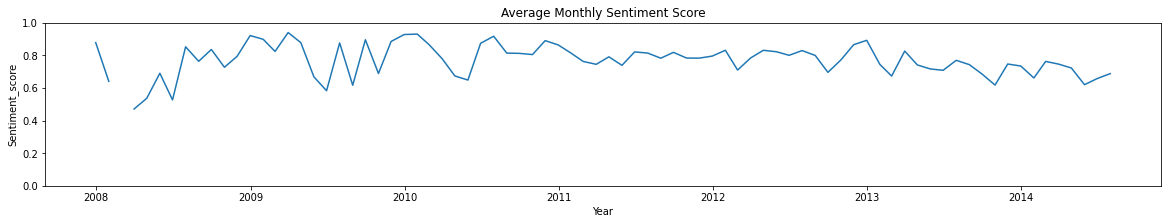

In [43]:
plt.plot(monthly_sentiment)
plt.xlabel('Year')
plt.ylabel('Sentiment_score')
plt.title('Average Monthly Sentiment Score')
plt.ylim(0,1)
plt.show()

> In general, the sentiment for this restaurant is positive with constant trend. So, Earl Sandwich has maintained its level of quality and service over the years.

## 6.	What is the topic focus of the reviews for ‘Earl Sandwich’ and how it has evolved through time?

> To get topics out of reviews corpus, we need to perform topic modelling. We can use LDA (Latent Dirichlet Allocation) to perform topic modelling. In LDA, the modelling process revolves around three things: the text corpus, its collection of documents, and the words in the documents. The LDA algorithm first models documents via a mixture model of topics. From these topics, words are then assigned weights based on the probability distribution of these topics. It is this probabilistic assignment over words that allow a user of LDA to say how likely a particular word falls into a topic. Subsequently from the collection of words assigned to a particular topic, are we thus able to gain an insight as to what that topic may actually represent from a lexical point of view. We can further perform word cloud visualizations on each topic.

In [44]:
from sklearn.feature_extraction.text import CountVectorizer

In [45]:
lemm = WordNetLemmatizer()
class LemmaCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(LemmaCountVectorizer, self).build_analyzer()
        return lambda doc: (lemm.lemmatize(w) for w in analyzer(doc))

In [46]:
# Calling our overwritten Count vectorizer
tf_vectorizer = LemmaCountVectorizer(max_df=0.95, 
                                     min_df=2,
                                     stop_words='english',
                                     decode_error='ignore')
tf = tf_vectorizer.fit_transform(word_list)

In [47]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=5, max_iter=5,
                                learning_method = 'online',
                                learning_offset = 50.,
                                random_state = 0)

In [48]:
lda.fit(tf)

LatentDirichletAllocation(learning_method='online', learning_offset=50.0,
                          max_iter=5, n_components=5, random_state=0)

In [49]:
# Define helper function to print top words

def print_top_words(model, feature_names, n_top_words):
    for index, topic in enumerate(model.components_):
        message = "\nTopic #{}:".format(index)
        message += " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1 :-1]])
        print(message)
        print("="*70)

In [50]:
n_top_words = 40
print("\nTopics in LDA model: ")
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words)


Topics in LDA model: 

Topic #0:face sammich gold establishment thai rueben chew 00 post remedy cheesesteak wrapped unwrapping cucumber saucy like closing comparable foil drunkenly remember incomplete question feta elevated cuban protein issue disappointing sensation felt rough nuff albeit said sandwich background view freshness anywho

Topic #1:sandwich good earl place vega time bread line like chicken food great really best delicious got try open long club soup eat price dont hour pretty definitely sauce night hollywood planet love ive strip come make order turkey montagu tuna

Topic #2:duke sandwhiches couldve negative repeat hoagie scream tropic jerky busiest virgin void tipsy slept footlong wedding weather sneak offered aint popping sanwich firehouse cesar stamp cocaine sophisticated hall healthiest degree novel voting provides teriyaki failure sho jean diluted pale pen

Topic #3:butter peanut chili foodie minimal smoking jelly customized steaming depressing pool connected funky 

C:\Users\sachi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [51]:
# Word cloud visualizations of the topics

first_topic = lda.components_[0]
second_topic = lda.components_[1]
third_topic = lda.components_[2]
fourth_topic = lda.components_[3]
fifth_topic = lda.components_[4]

In [52]:
first_topic.shape

(4176,)

In [53]:
# Wordcloud visualizations of topics

first_topic_words = [tf_feature_names[i] for i in first_topic.argsort()[:-1000 - 1 :-1]]
second_topic_words = [tf_feature_names[i] for i in second_topic.argsort()[:-1000 - 1 :-1]]
third_topic_words = [tf_feature_names[i] for i in third_topic.argsort()[:-1000 - 1 :-1]]
fourth_topic_words = [tf_feature_names[i] for i in fourth_topic.argsort()[:-1000 - 1 :-1]]
fifth_topic_words = [tf_feature_names[i] for i in fifth_topic.argsort()[:-1000 - 1 :-1]]

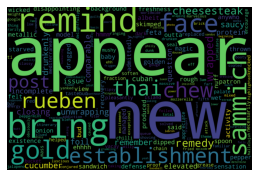

In [54]:
# Wordcloud first topic

firstcloud = WordCloud(
                          background_color='black',
                          width=3000,
                          height=2000
                         ).generate(" ".join(first_topic_words))
plt.imshow(firstcloud)
plt.axis('off')
plt.show()

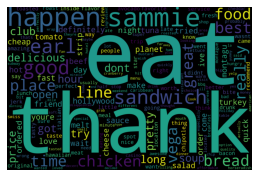

In [55]:
# Wordcloud second topic

secondcloud = WordCloud(
                          background_color='black',
                          width=3000,
                          height=2000
                         ).generate(" ".join(second_topic_words))
plt.imshow(secondcloud)
plt.axis('off')
plt.show()

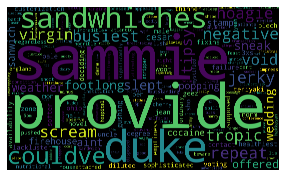

In [56]:
# Wordcloud third topic

thirdcloud = WordCloud(
                          background_color='black',
                          width=10000,
                          height=6000
                         ).generate(" ".join(third_topic_words))
plt.imshow(thirdcloud)
plt.axis('off')
plt.show()

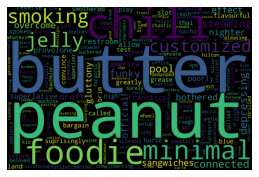

In [57]:
# Wordcloud fourth topic

fourthcloud = WordCloud(
                          background_color='black',
                          width=3000,
                          height=2000
                         ).generate(" ".join(fourth_topic_words))
plt.imshow(fourthcloud)
plt.axis('off')
plt.show()

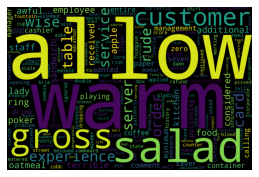

In [58]:
# Wordcloud fifth topic

fifthcloud = WordCloud(
                          background_color='black',
                          width=3000,
                          height=2000
                         ).generate(" ".join(fifth_topic_words))
plt.imshow(fifthcloud)
plt.axis('off')
plt.show()

> First topic talks about verbs or action words like remind, appear, bring, etc. Second topic is focused on positive words like thank, great, good, etc. Third topic talks about types of sandwiches, slices of bread, hoagie i.e. submarine sandwich, etc. Fourth topic talks about sandwich ingredients like peanuts, chili, butter, jelly, etc. Fifth topic talks about table service with words like warm, salad, table, card, etc. Company can use this information to realize and work on various aspects of their menu, offerings and service.

## 7.	Why people love the sandwich? …Is it because of any special taste, service, quality etc.

> To answer this question, we can use the Word2Vec model and see what the words are most likely around our target words such as taste, service, etc. Word2Vec uses a neural network model to learn word associations from the corpus. Compared to BOW and n-grams, Word2Vec leverages the context and better captures the meaning and relationship of the word.

In [60]:
from nltk.corpus import stopwords
my_stop_words = set(stopwords.words('english') + ['super', 'duper', 'place'])

In [61]:
from nltk.tokenize import sent_tokenize
good_reviews = ' '.join(df_1.text)

sentences_good = sent_tokenize(good_reviews)

good_token_clean = list()

import re
# get tokens for each sentence
for sentence in sentences_good:
    eng_word = re.findall(r'[A-Za-z\-]+', sentence)
    good_token_clean.append([i.lower() for i in eng_word if i.lower() not in my_stop_words])

In [62]:
print(sentences_good[:2])

['one good reasonable place eat vegas around planet hollywood the sandwich good price reasonable (especially lose hundred casino ).. went twice sandwich tried really good one very efficient system also order want make fresh quickly save money eat ... very good sandwich and cost las vegas very cheap price love hawaiian sandwich jamaican jerky sandwich tasty even went back another time another restaurant called hawaiian tropic behind and checked price time higher and waitress clothes cloth time le wow amazing delicious the top three word come mind think place found accident walking planet hollywood way strip great surprise turkey club (or something along line expected something like would get quiznos this quiznos normal toasted sandwich delicious thing think ive ever definitely good choice they fast service friendly people wide variety hope open around country know theyd welcome atlanta anytime turkey club want need day eating food convention center --yucky.', 'all sandos toasted fresh t

In [63]:
print(good_token_clean[:2])

[['one', 'good', 'reasonable', 'eat', 'vegas', 'around', 'planet', 'hollywood', 'sandwich', 'good', 'price', 'reasonable', 'especially', 'lose', 'hundred', 'casino', 'went', 'twice', 'sandwich', 'tried', 'really', 'good', 'one', 'efficient', 'system', 'also', 'order', 'want', 'make', 'fresh', 'quickly', 'save', 'money', 'eat', 'good', 'sandwich', 'cost', 'las', 'vegas', 'cheap', 'price', 'love', 'hawaiian', 'sandwich', 'jamaican', 'jerky', 'sandwich', 'tasty', 'even', 'went', 'back', 'another', 'time', 'another', 'restaurant', 'called', 'hawaiian', 'tropic', 'behind', 'checked', 'price', 'time', 'higher', 'waitress', 'clothes', 'cloth', 'time', 'le', 'wow', 'amazing', 'delicious', 'top', 'three', 'word', 'come', 'mind', 'think', 'found', 'accident', 'walking', 'planet', 'hollywood', 'way', 'strip', 'great', 'surprise', 'turkey', 'club', 'something', 'along', 'line', 'expected', 'something', 'like', 'would', 'get', 'quiznos', 'quiznos', 'normal', 'toasted', 'sandwich', 'delicious', 'thi

In [64]:
from gensim.models import Word2Vec
model_ted = Word2Vec(sentences=good_token_clean, window=10, min_count=1, workers=4, sg=0)
model_ted.predict_output_word(['taste'], topn=10)

[('fresh', 0.0025540306),
 ('tomato', 0.0015224975),
 ('bread', 0.0014103445),
 ('toasted', 0.0014029089),
 ('meat', 0.0013982785),
 ('perfectly', 0.001391859),
 ('ingredient', 0.0012857775),
 ('soft', 0.0012012541),
 ('flavor', 0.0011781682),
 ('warm', 0.0011695925)]

In [65]:
from gensim.models import Word2Vec
model_ted = Word2Vec(sentences=good_token_clean, window=10, min_count=1, workers=4, sg=0)
model_ted.predict_output_word(['service'], topn=10)

[('fast', 0.014766043),
 ('move', 0.011022614),
 ('long', 0.010693932),
 ('line', 0.0104885325),
 ('service', 0.007016719),
 ('quick', 0.006434943),
 ('wait', 0.006327843),
 ('quickly', 0.003852191),
 ('minute', 0.0029184252),
 ('worth', 0.0023221406)]

> People appreciate their fast, quickly customer service. Also, the menu items is rich in freshness and warmth which complements the taste.  We can do the same for other target words that we are interested in. These surrounding words are very informative and they can better explain why people love or explain about certain things.

> Reference Links & articles:
> 1. https://www.kaggle.com/code/arthurtok/spooky-nlp-and-topic-modelling-tutorial
> 2. https://towardsdatascience.com/text-mining-and-sentiment-analysis-for-yelp-reviews-of-a-burger-chain-6d3bcfcab17b
> 3. https://www.kaggle.com/code/rcushen/topic-modelling-with-lsa-and-lda
> 4. https://www.kaggle.com/code/omkarsabnis/sentiment-analysis-on-the-yelp-reviews-dataset